In [3]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Downloading Dataset

In [5]:
!kaggle datasets download -d mfekadu/darpa-timit-acousticphonetic-continuous-speech

 98% 809M/829M [00:05<00:00, 172MB/s]
100% 829M/829M [00:05<00:00, 162MB/s]


In [6]:
!unzip -qq *.zip

In [7]:
import pandas as pd

In [8]:
import warnings
warnings.filterwarnings("ignore")

# EDA

## Reading the CSV File as DataFrame

In [9]:
df=pd.read_csv("train_data.csv")

In [10]:
df.head()

,index,test_or_train,dialect_region,speaker_id,filename,path_from_data_dir,path_from_data_dir_windows,is_converted_audio,is_audio,is_word_file,is_phonetic_file,is_sentence_file
0,1.0,TRAIN,DR4,MMDM0,SI681.WAV.wav,TRAIN/DR4/MMDM0/SI681.WAV.wav,TRAIN\\DR4\\MMDM0\\SI681.WAV.wav,True,True,False,False,False
1,2.0,TRAIN,DR4,MMDM0,SI1311.PHN,TRAIN/DR4/MMDM0/SI1311.PHN,TRAIN\\DR4\\MMDM0\\SI1311.PHN,False,False,False,True,False
2,3.0,TRAIN,DR4,MMDM0,SI1311.WRD,TRAIN/DR4/MMDM0/SI1311.WRD,TRAIN\\DR4\\MMDM0\\SI1311.WRD,False,False,True,False,False
3,4.0,TRAIN,DR4,MMDM0,SX321.PHN,TRAIN/DR4/MMDM0/SX321.PHN,TRAIN\\DR4\\MMDM0\\SX321.PHN,False,False,False,True,False
4,5.0,TRAIN,DR4,MMDM0,SX321.WRD,TRAIN/DR4/MMDM0/SX321.WRD,TRAIN\\DR4\\MMDM0\\SX321.WRD,False,False,True,False,False


In [11]:
df["dialect_region"].unique()

array(['DR4', 'DR3', 'DR2', 'DR5', 'DR7', 'DR6', 'DR1', 'DR8', nan],
      dtype=object)

## Selecting Training Dialect

In [12]:
t_d_r=["DR1","DR2"]

In [13]:
train_df=df.loc[df['dialect_region'].isin(t_d_r)]

In [14]:
train_df['dialect_region'].unique()

array(['DR2', 'DR1'], dtype=object)

In [15]:
train_df.drop("path_from_data_dir_windows",axis=1,inplace=True)

In [16]:
train_df.head()

,index,test_or_train,dialect_region,speaker_id,filename,path_from_data_dir,is_converted_audio,is_audio,is_word_file,is_phonetic_file,is_sentence_file
7200,7201.0,TRAIN,DR2,FJKL0,SX32.PHN,TRAIN/DR2/FJKL0/SX32.PHN,False,False,False,True,False
7201,7202.0,TRAIN,DR2,FJKL0,SX212.WAV.wav,TRAIN/DR2/FJKL0/SX212.WAV.wav,True,True,False,False,False
7202,7203.0,TRAIN,DR2,FJKL0,SX32.WRD,TRAIN/DR2/FJKL0/SX32.WRD,False,False,True,False,False
7203,7204.0,TRAIN,DR2,FJKL0,SI932.WRD,TRAIN/DR2/FJKL0/SI932.WRD,False,False,True,False,False
7204,7205.0,TRAIN,DR2,FJKL0,SX302.TXT,TRAIN/DR2/FJKL0/SX302.TXT,False,False,False,False,True


## Selecting Testing Dialect

In [17]:
test_df=df.loc[df['dialect_region']=="DR3"]

In [18]:
train_df["FType"]=train_df["path_from_data_dir"].str.split('.')

In [19]:
def extract_FType(l):
  return l[-1]

In [20]:
train_df["FType"]=train_df["FType"].apply(lambda x:extract_FType(x) )

## Exploring Types of Files

In [21]:
train_df["FType"]

7200     PHN
7201     wav
7202     WRD
7203     WRD
7204     TXT
        ... 
21995    WRD
21996    WAV
21997    WAV
21998    TXT
21999    TXT
Name: FType, Length: 5700, dtype: object

## Filetypes to be read

In [22]:
ftypes=["PHN","WRD","TXT"]
train_df=train_df.loc[train_df['FType'].isin(ftypes)]

In [23]:
train_df.head()

,index,test_or_train,dialect_region,speaker_id,filename,path_from_data_dir,is_converted_audio,is_audio,is_word_file,is_phonetic_file,is_sentence_file,FType
7200,7201.0,TRAIN,DR2,FJKL0,SX32.PHN,TRAIN/DR2/FJKL0/SX32.PHN,False,False,False,True,False,PHN
7202,7203.0,TRAIN,DR2,FJKL0,SX32.WRD,TRAIN/DR2/FJKL0/SX32.WRD,False,False,True,False,False,WRD
7203,7204.0,TRAIN,DR2,FJKL0,SI932.WRD,TRAIN/DR2/FJKL0/SI932.WRD,False,False,True,False,False,WRD
7204,7205.0,TRAIN,DR2,FJKL0,SX302.TXT,TRAIN/DR2/FJKL0/SX302.TXT,False,False,False,False,True,TXT
7205,7206.0,TRAIN,DR2,FJKL0,SX122.WRD,TRAIN/DR2/FJKL0/SX122.WRD,False,False,True,False,False,WRD


In [24]:
train_df["path_from_data_dir"]="/content/data/"+train_df["path_from_data_dir"]

In [25]:
train_df.head()

,index,test_or_train,dialect_region,speaker_id,filename,path_from_data_dir,is_converted_audio,is_audio,is_word_file,is_phonetic_file,is_sentence_file,FType
7200,7201.0,TRAIN,DR2,FJKL0,SX32.PHN,/content/data/TRAIN/DR2/FJKL0/SX32.PHN,False,False,False,True,False,PHN
7202,7203.0,TRAIN,DR2,FJKL0,SX32.WRD,/content/data/TRAIN/DR2/FJKL0/SX32.WRD,False,False,True,False,False,WRD
7203,7204.0,TRAIN,DR2,FJKL0,SI932.WRD,/content/data/TRAIN/DR2/FJKL0/SI932.WRD,False,False,True,False,False,WRD
7204,7205.0,TRAIN,DR2,FJKL0,SX302.TXT,/content/data/TRAIN/DR2/FJKL0/SX302.TXT,False,False,False,False,True,TXT
7205,7206.0,TRAIN,DR2,FJKL0,SX122.WRD,/content/data/TRAIN/DR2/FJKL0/SX122.WRD,False,False,True,False,False,WRD


In [26]:
train_df["path_from_data_dir"].values[0].split('.')[0]

'/content/data/TRAIN/DR2/FJKL0/SX32'

## Extracting Words from Selected fie types
* Extracting Words and Associated Phoneme from the files

In [27]:
def words(dir):
  w=[]
  phn = []
  dir=dir.split('.')[0]
  dict_file_wrd = open(str(dir+".WRD"), 'r')
  dict_file_phn = open(str(dir+".PHN"), 'r')
  with dict_file_wrd as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
      p=p.split(' ')
      s="".join(p[2:])
      w.append(s)
  with dict_file_phn as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
      p=p.split(' ')
      s="".join(p[2:])
      phn.append(s)
  return w,phn

In [28]:
train_df["path_from_data_dir"].values[0]

'/content/data/TRAIN/DR2/FJKL0/SX32.PHN'

In [29]:
len(train_df["path_from_data_dir"])

3420

In [30]:
w=[]
p=[]
for l in train_df["path_from_data_dir"]:
  wp,ph=words(l)
  w.append(wp)
  p.append(ph)

In [31]:
len(p),len(w)

(3420, 3420)

In [32]:
data = pd.DataFrame({'Word': w, 'Phonics': p})
data.head()

,Word,Phonics
0,"[it's, fun, to, roast, marshmallows, on, a, ga...","[h#, ix, tcl, s, f, ah, n, d, axr, r, ow, s, t..."
1,"[it's, fun, to, roast, marshmallows, on, a, ga...","[h#, ix, tcl, s, f, ah, n, d, axr, r, ow, s, t..."
2,"[his, prescription, hot, and, cold, compresses...","[h#, hh, ih, z, pcl, p, axr, s, kcl, k, r, ih,..."
3,"[tofu, is, made, from, processed, soybeans]","[h#, t, ow, f, uw, ih, z, m, ey, dcl, f, r, em..."
4,"[encyclopedias, seldom, present, anecdotal, ev...","[h#, q, ix, n, s, ay, kcl, k, l, ix, pcl, p, i..."


In [33]:
def joiner(w):
  return " ".join(w)

In [34]:
data_fin = data["Word"].apply(lambda x:joiner(x))

In [35]:
data_fin

0          it's fun to roast marshmallows on a gas burner
1          it's fun to roast marshmallows on a gas burner
2       his prescription hot and cold compresses to in...
3                    tofu is made from processed soybeans
4         encyclopedias seldom present anecdotal evidence
                              ...                        
3415                  most young rise early every morning
3416                    clasp the screw in your left hand
3417                    clasp the screw in your left hand
3418                 the two artists exchanged autographs
3419    in simpler terms it amounts to pointing the pl...
Name: Word, Length: 3420, dtype: object

In [36]:
data_fin.columns=["Words"]

In [37]:
data_fin_ph=data["Phonics"].apply(lambda x:joiner(x))

In [38]:
data_fin=pd.DataFrame(list(zip(data_fin,data_fin_ph)),columns=["Words","Phonemes"])

## DataFrame with Sentences in Word and Phoneme Form Created

In [39]:
data_fin.head()

,Words,Phonemes
0,it's fun to roast marshmallows on a gas burner,h# ix tcl s f ah n d axr r ow s tcl t m aa r s...
1,it's fun to roast marshmallows on a gas burner,h# ix tcl s f ah n d axr r ow s tcl t m aa r s...
2,his prescription hot and cold compresses to in...,h# hh ih z pcl p axr s kcl k r ih pcl sh ix n ...
3,tofu is made from processed soybeans,h# t ow f uw ih z m ey dcl f r em pcl p r aa s...
4,encyclopedias seldom present anecdotal evidence,h# q ix n s ay kcl k l ix pcl p iy dcl d iy ix...


In [40]:
data.values[5]

array([list(['encyclopedias', 'seldom', 'present', 'anecdotal', 'evidence']),
       list(['h#', 'q', 'ix', 'n', 's', 'ay', 'kcl', 'k', 'l', 'ix', 'pcl', 'p', 'iy', 'dcl', 'd', 'iy', 'ix', 's', 'eh', 'l', 'dcl', 'd', 'ax', 'm', 'pcl', 'p', 'r', 'ih', 'z', 'eh', 'n', 'tcl', 't', 'q', 'ae', 'n', 'eh', 'kcl', 'd', 'ow', 'dx', 'el', 'q', 'eh', 'v', 'ix', 'dx', 'ix', 'n', 'tcl', 's', 'h#'])],
      dtype=object)

## Creating a Complete Word Phoneme Corpus DataFrame

In [41]:
w=[]
phn = []
dict_file = open(str("TIMITDIC.TXT"), 'r')
with dict_file as f:
  for _ in range(20):
        next(f)
  phonics = [line.rstrip('\n') for line in f]
  for p in phonics:
    temp=p.rstrip('/')
    temp=temp.split(' ')
    w.append(temp[0])
    phn.append(" ".join(temp[1:]).replace("/",""))

In [42]:
w[2],phn[2]

('-upmanship', ' ah1 p m ax n sh ih p')

In [43]:
corpus = pd.DataFrame({'Word': w, 'Phonics': phn})
corpus.head()

,Word,Phonics
0,'em,ax m
1,-knacks,n ae1 k s
2,-upmanship,ah1 p m ax n sh ih p
3,-ups,ah p s
4,-zagged,z ae1 g d


In [44]:
wrd=corpus['Phonics'].loc[corpus['Word']=="-ups"]
print("".join(wrd))

 ah p s


## Matching the Sentence Words with the Corpus and Creating the Data Frame with Word Phoneme

In [45]:
word_dict=[]
phoneme_dict=[]
for d in data_fin["Words"]:
  d="".join(d)
  temp=d.split(' ')
  for t in temp:
      phoneme_dict.append("".join(corpus['Phonics'].loc[corpus['Word']==t]))
      word_dict.append("".join(t))


In [46]:
word_dict

["it's",
 'fun',
 'to',
 'roast',
 'marshmallows',
 'on',
 'a',
 'gas',
 'burner',
 "it's",
 'fun',
 'to',
 'roast',
 'marshmallows',
 'on',
 'a',
 'gas',
 'burner',
 'his',
 'prescription',
 'hot',
 'and',
 'cold',
 'compresses',
 'to',
 'increase',
 'her',
 'absorption',
 'of',
 'water',
 'tofu',
 'is',
 'made',
 'from',
 'processed',
 'soybeans',
 'encyclopedias',
 'seldom',
 'present',
 'anecdotal',
 'evidence',
 'encyclopedias',
 'seldom',
 'present',
 'anecdotal',
 'evidence',
 'his',
 'prescription',
 'hot',
 'and',
 'cold',
 'compresses',
 'to',
 'increase',
 'her',
 'absorption',
 'of',
 'water',
 'but',
 'now',
 'she',
 'looked',
 'ugly',
 'but',
 'now',
 'she',
 'looked',
 'ugly',
 'was',
 'it',
 'a',
 'birthday',
 'ball',
 'a',
 'young',
 'mouse',
 'scampered',
 'across',
 'the',
 'field',
 'and',
 'disappeared',
 'a',
 'young',
 'mouse',
 'scampered',
 'across',
 'the',
 'field',
 'and',
 'disappeared',
 'i',
 'gave',
 'them',
 'several',
 'choices',
 'and',
 'let',
 'them

In [47]:
data_dict = pd.DataFrame({'Word': word_dict, 'Phonics': phoneme_dict})
data_dict.head()

,Word,Phonics
0,it's,ih1 t s
1,fun,f ah1 n
2,to,t uw1
3,roast,r ow1 s t
4,marshmallows,m aa1 r sh m eh2 l ow z


In [48]:
data_dict.shape

(29562, 2)

In [49]:
import tensorflow as tf

## Tokenization

In [50]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'h#': 2, 'ix': 3, 's': 4, 'n': 5, 'iy': 6, 'tcl': 7, 'r': 8, 'l': 9, 'kcl': 10, 'dcl': 11, 'k': 12, 'ih': 13, 't': 14, 'ae': 15, 'm': 16, 'eh': 17, 'q': 18, 'd': 19, 'z': 20, 'ax': 21, 'axr': 22, 'aa': 23, 'w': 24, 'dh': 25, 'ao': 26, 'pcl': 27, 'p': 28, 'dx': 29, 'ay': 30, 'sh': 31, 'ah': 32, 'f': 33, 'gcl': 34, 'ey': 35, 'ow': 36, 'er': 37, 'b': 38, 'g': 39, 'v': 40, 'bcl': 41, 'ux': 42, 'y': 43, 'epi': 44, 'ng': 45, 'jh': 46, 'hv': 47, 'el': 48, 'nx': 49, 'pau': 50, 'hh': 51, 'ch': 52, 'th': 53, 'aw': 54, 'oy': 55, 'en': 56, 'uw': 57, 'uh': 58, 'ax-h': 59, 'zh': 60, 'em': 61, 'eng': 62}


In [51]:
data_dict = data_dict[~data_dict['Phonics'].str.contains('#')].reset_index(drop=True)
data_dict.sample(10)

,Word,Phonics
18558,very,v eh1 r iy
29322,in,ih1 n
29157,had,hh ae1 d
11403,angry,ae1 ng g r iy
22135,an,ae n
17164,gas,g ae1 s
18902,thinker,th ih1 ng k axr
3067,and,ae n d
3317,away,ax w ey1
13683,john's,jh aa1 n z


In [52]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data_dict['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 't': 2, 'n': 3, 'r': 4, 's': 5, 'k': 6, 'd': 7, 'ax': 8, 'l': 9, 'ae1': 10, 'ih1': 11, 'm': 12, 'z': 13, 'iy1': 14, 'ao1': 15, 'iy': 16, 'dh': 17, 'w': 18, 'ix': 19, 'p': 20, 'uw1': 21, 'axr': 22, 'aa1': 23, 'hh': 24, 'g': 25, 'eh1': 26, 'b': 27, 'sh': 28, 'f': 29, 'ay1': 30, 'v': 31, 'y': 32, 'ow1': 33, 'ih': 34, 'ah1': 35, 'ey1': 36, 'ng': 37, 'ae': 38, 'uh1': 39, 'jh': 40, 'el': 41, 'er1': 42, 'ch': 43, 'aw1': 44, 'oy1': 45, 'th': 46, 'ey2': 47, 'ae2': 48, 'ih2': 49, 'eh2': 50, 'ay2': 51, 'ow2': 52, 'uw': 53, 'en': 54, 'er': 55, 'ow': 56, 'ah2': 57, 'uw2': 58, 'aa2': 59, 'iy2': 60, 'ao': 61, 'uh': 62, 'ay': 63, 'eh': 64, 'aa': 65, 'zh': 66, 'ao2': 67, 'ey': 68, 'ah': 69, 'oy2': 70, 'er2': 71, 'uh2': 72, 'aw2': 73, 'em': 74, 'aw': 75}


In [53]:
vocab_length = len(tokenizer.word_index) + 1
vocab_length

76

## Text To Sequences

In [54]:
sequences = tokenizer.texts_to_sequences(data_dict['Phonics'].values)
print(sequences[:5])

[[11, 2, 5], [29, 35, 3], [2, 21], [4, 33, 5, 2], [12, 23, 4, 28, 12, 50, 9, 56, 13]]


In [55]:
longest_sentence = len(max(sequences, key=len))
longest_sentence

14

## Padded Phonics

In [56]:
padded_phonics = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence, padding='post')
print(padded_phonics[:5])

[[11  2  5  0  0  0  0  0  0  0  0  0  0  0]
 [29 35  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4 33  5  2  0  0  0  0  0  0  0  0  0  0]
 [12 23  4 28 12 50  9 56 13  0  0  0  0  0]]


In [57]:

len(data_dict['Word'].unique())

2396

## Model Building with LSTM - Model 1

In [58]:
embedding_dim = 10
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, 
                              input_length=longest_sentence),
    tf.keras.layers.LSTM(256, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(data_dict['Word'].unique()), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 10)            760       
                                                                 
 lstm (LSTM)                 (None, 14, 256)           273408    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2396)              155740    
                                                                 
Total params: 635,284
Trainable params: 635,284
Non-trainable params: 0
_________________________________________________________________


In [59]:
from sklearn.preprocessing import LabelEncoder

## Label Encoding

In [60]:
y = data_dict['Word'].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

## Model Training

In [61]:
history = model.fit(padded_phonics, encoded_y, epochs=100)

Epoch 1/100
924/924 [==============================] - 17s 10ms/step - loss: 6.5388 - accuracy: 0.0386
Epoch 2/100
924/924 [==============================] - 7s 7ms/step - loss: 6.3654 - accuracy: 0.0401
Epoch 3/100
924/924 [==============================] - 7s 8ms/step - loss: 6.3582 - accuracy: 0.0401
Epoch 4/100
924/924 [==============================] - 6s 7ms/step - loss: 6.3569 - accuracy: 0.0401
Epoch 5/100
924/924 [==============================] - 6s 7ms/step - loss: 6.3534 - accuracy: 0.0401
Epoch 6/100
924/924 [==============================] - 6s 7ms/step - loss: 6.3500 - accuracy: 0.0401
Epoch 7/100
924/924 [==============================] - 6s 7ms/step - loss: 6.1729 - accuracy: 0.0573
Epoch 8/100
924/924 [==============================] - 6s 7ms/step - loss: 5.9836 - accuracy: 0.0731
Epoch 9/100
924/924 [==============================] - 6s 7ms/step - loss: 5.5749 - accuracy: 0.1101
Epoch 10/100
924/924 [==============================] - 7s 7ms/step - loss: 4.0815 - accu

## Model Evaluation

In [62]:
model.evaluate(padded_phonics, encoded_y)

924/924 [==============================] - 4s 4ms/step - loss: 0.0351 - accuracy: 0.9886


[0.03514425829052925, 0.9886340498924255]

## Testing

In [63]:
sentence="At ambulance departure he is seldom present for the essay he wandered"

In [64]:
word_dict_eval=[]
phoneme_dict_eval=[]
temp=sentence.split(' ')
for t in temp:
    phoneme_dict_eval.append("".join(corpus['Phonics'].loc[corpus['Word']==t]))
    word_dict_eval.append("".join(t))

In [65]:
data_dict_eval = pd.DataFrame({'Word': word_dict_eval, 'Phonics': phoneme_dict_eval})
data_dict_eval.head()

,Word,Phonics
0,At,
1,ambulance,ae1 m b y uh l ax n s
2,departure,d ax p aa1 r ch axr
3,he,hh iy1
4,is,ih1 z


In [66]:
data_dict_eval.head(10)

,Word,Phonics
0,At,
1,ambulance,ae1 m b y uh l ax n s
2,departure,d ax p aa1 r ch axr
3,he,hh iy1
4,is,ih1 z
5,seldom,s eh1 l d ax m
6,present,
7,for,f ao1 r
8,the,dh ax
9,essay,eh1 s ey2


* We observe that our test sentence words have been converted into their respective phonemes properly with few exceptions
* These Exceptions maybe unknown words that may not have been part of the training.
* With the Test Dataframe Ready, we are now proceeding towards Tokenization and Padding and will try to predict

In [67]:
tokenizer_eval = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer_eval.fit_on_texts(data_dict_eval['Phonics'].values)
word_index_eval = tokenizer_eval.word_index
print(word_index_eval)
vocab_length_eval = len(tokenizer_eval.word_index) + 1
print(vocab_length_eval)
sequences_eval = tokenizer_eval.texts_to_sequences(data_dict_eval['Phonics'].values)
print(sequences_eval[:5])
longest_sentence_eval = len(max(sequences_eval, key=len))
longest_sentence_eval
padded_phonics_eval = tf.keras.preprocessing.sequence.pad_sequences(sequences_eval, maxlen=14, padding='post')
print(padded_phonics_eval[:5])

{'<OOV>': 1, 'ax': 2, 'd': 3, 's': 4, 'm': 5, 'l': 6, 'n': 7, 'aa1': 8, 'r': 9, 'axr': 10, 'hh': 11, 'iy1': 12, 'eh1': 13, 'ae1': 14, 'b': 15, 'y': 16, 'uh': 17, 'p': 18, 'ch': 19, 'ih1': 20, 'z': 21, 'f': 22, 'ao1': 23, 'dh': 24, 'ey2': 25, 'w': 26}
27
[[], [14, 5, 15, 16, 17, 6, 2, 7, 4], [3, 2, 18, 8, 9, 19, 10], [11, 12], [20, 21]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  5 15 16 17  6  2  7  4  0  0  0  0  0]
 [ 3  2 18  8  9 19 10  0  0  0  0  0  0  0]
 [11 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [20 21  0  0  0  0  0  0  0  0  0  0  0  0]]


In [68]:
padded_phonics_eval

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [14,  5, 15, 16, 17,  6,  2,  7,  4,  0,  0,  0,  0,  0],
       [ 3,  2, 18,  8,  9, 19, 10,  0,  0,  0,  0,  0,  0,  0],
       [11, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 13,  6,  3,  2,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [22, 23,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [24,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  4, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [26,  8,  7,  3, 10,  3,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32)

In [69]:
padded_phonics_eval[6].reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [70]:
predictions=model.predict(padded_phonics_eval)

In [71]:
import numpy as np
predictions

array([[8.4121980e-12, 2.3752271e-09, 8.0257092e-07, ..., 8.3083348e-14,
        1.7786692e-11, 3.9372230e-07],
       [5.4997397e-29, 3.2696879e-33, 1.9181656e-33, ..., 9.2997947e-36,
        3.6411296e-36, 2.3586591e-37],
       [9.3274963e-26, 6.3094959e-18, 1.2664320e-22, ..., 2.3194510e-34,
        2.1244276e-16, 6.0277208e-22],
       ...,
       [1.4876040e-33, 3.0079708e-23, 8.9533660e-29, ..., 3.3008292e-36,
        2.5944494e-22, 5.1366135e-33],
       [2.3358016e-15, 3.3193621e-30, 5.5567939e-20, ..., 4.0244801e-15,
        5.8869628e-15, 8.2858839e-13],
       [0.0000000e+00, 1.1209713e-36, 0.0000000e+00, ..., 3.0434513e-32,
        2.0520075e-34, 8.2423463e-23]], dtype=float32)

In [72]:
predictions=np.argmax(predictions, axis=1)

In [73]:
word_pred = encoder.inverse_transform(predictions)

In [74]:
word_pred

array(['use', 'evening', 'involved', 'it', 'eight', 'evening', 'use',
       'pool', 'how', 'see', 'it', 'economy'], dtype=object)

* Word Predictions Show that the predictions are not accurate

## Using Time Steps - Extracting the phoneme of a word as per time step

In [75]:
import glob,tqdm,re,os
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer

In [76]:
w = pd.read_csv("data/TRAIN/DR1/FCJF0/SA1.WRD",sep=' ',header=None)
p = pd.read_csv("data/TRAIN/DR1/FCJF0/SA1.PHN",sep=' ',header=None)

In [77]:
w.head()

,0,1,2
0,3050,5723,she
1,5723,10337,had
2,9190,11517,your
3,11517,16334,dark
4,16334,21199,suit


In [78]:
p.head()

,0,1,2
0,0,3050,h#
1,3050,4559,sh
2,4559,5723,ix
3,5723,6642,hv
4,6642,8772,eh


## Data Preprocessing - Time step wise word phoneme pair Extraction

In [79]:
dialects = ['DR1','DR2','DR3']
wds = []
for d in dialects:
    word_paths = glob.glob(f'data/TRAIN/{d}/*/*.WRD', recursive = True)
    for word_path in tqdm(word_paths):
        s_pattern = re.findall("\/[A-Z0-9]+\/[A-Z0-9]+.WRD",word_path)[0].split(".")[0]
        pattern = re.findall("[A-Z0-9]+.WRD",word_path)[0].split(".")[0]
        s_path = re.findall(".+\/",word_path)[0]
        p_path = os.path.join(s_path,pattern+'.PHN')
        words = pd.read_csv(word_path,sep=' ',header=None)
        phs = pd.read_csv(p_path,sep=' ',header=None)
        words['dialect'] = [d]*len(words)
        words['speaker'] = [s_pattern]*len(words)
        for index,record in words.iterrows():
            ph = ' '.join(phs[(phs[0]>=record[0]) & (phs[1]<=record[1])][2].tolist())
            words.loc[index,'phoneme'] = ph
        wds.append(words)

100%|██████████| 760/760 [00:09<00:00, 82.39it/s]


## Creating the final DataFrame

In [80]:
data = pd.concat(wds)
data.reset_index(drop=True,inplace=True)
data.columns = ['s','e','word','dialect','speaker','phoneme']
data.head()

,s,e,word,dialect,speaker,phoneme
0,11028,13869,don't,DR1,/MTJS0/SA2,d ow nx
1,13869,19000,ask,DR1,/MTJS0/SA2,ae s kcl
2,19000,20600,me,DR1,/MTJS0/SA2,m iy
3,20600,22023,to,DR1,/MTJS0/SA2,dx ix
4,22023,28532,carry,DR1,/MTJS0/SA2,kcl k ae r iy


## Train Test Spliting as per Dialect

In [81]:
train = set(data[data['dialect'].isin(['DR1','DR2'])]['word'].tolist())
val = set(data[data['dialect']=='DR3']['word'].tolist())

In [82]:
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['word'])

In [83]:
train = data[data['dialect'].isin(['DR1','DR2'])][['phoneme','word','label']]
train = train.sample(frac=1).reset_index(drop=True)
val = data[data['dialect']=='DR3'].reset_index(drop=True)[['phoneme','word','label']]

## Tokenization

In [84]:
phonemes = data['phoneme'].tolist()
tokenizer = Tokenizer(oov_token='OOV')
tokenizer.fit_on_texts(phonemes)
vocab_size = len(tokenizer.word_index) + 1

## Sequencing

In [85]:
seq = train['phoneme'].values
train_sequences = tokenizer.texts_to_sequences(train['phoneme'].values)
val_sequences = tokenizer.texts_to_sequences(val['phoneme'].values)
max_length = len(max(sequences, key=len))

In [86]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Padding

In [87]:
X_train = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_val = pad_sequences(val_sequences, maxlen=max_length, padding='post')
y_train = train['label'].values
y_val = val['label'].values

In [88]:
from tensorflow.keras.layers import Embedding, Input, LSTM, Dense, Bidirectional

## Bidirectional LSTM Model - Model 2

In [89]:
embedding_dim = 10
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, 
                              input_length=max_length),
    Bidirectional(LSTM(256, activation='tanh', return_sequences=True)),
    Bidirectional(LSTM(128, activation='tanh')),
    Dense(64, activation='relu'),
    Dense(data['label'].nunique(), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 10)            620       
                                                                 
 bidirectional (Bidirectiona  (None, 14, 512)          546816    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 3094)              201110    
                                                                 
Total params: 1,421,378
Trainable params: 1,421,378
Non-

In [90]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0,
    mode='auto'
)

## Training the Model

In [91]:
history = model.fit(X_train,y_train,
                    batch_size=16,
                    epochs=30,
                    validation_data=(X_val,y_val),
                    validation_batch_size=32,
                    callbacks = [early_stop_cb])

Epoch 1/30
616/616 [==============================] - 13s 14ms/step - loss: 6.4957 - accuracy: 0.0484 - val_loss: 5.8279 - val_accuracy: 0.0886
Epoch 2/30
616/616 [==============================] - 7s 12ms/step - loss: 5.4763 - accuracy: 0.1046 - val_loss: 5.4661 - val_accuracy: 0.1756
Epoch 3/30
616/616 [==============================] - 7s 12ms/step - loss: 4.9164 - accuracy: 0.2067 - val_loss: 5.1371 - val_accuracy: 0.2372
Epoch 4/30
616/616 [==============================] - 7s 12ms/step - loss: 4.3832 - accuracy: 0.2865 - val_loss: 4.8694 - val_accuracy: 0.3365
Epoch 5/30
616/616 [==============================] - 7s 12ms/step - loss: 3.9477 - accuracy: 0.3397 - val_loss: 4.6574 - val_accuracy: 0.3639
Epoch 6/30
616/616 [==============================] - 7s 12ms/step - loss: 3.5863 - accuracy: 0.3772 - val_loss: 4.5183 - val_accuracy: 0.3862
Epoch 7/30
616/616 [==============================] - 8s 13ms/step - loss: 3.2870 - accuracy: 0.4063 - val_loss: 4.4773 - val_accuracy: 0.405

In [92]:
model.evaluate(X_val,y_val)

208/208 [==============================] - 1s 6ms/step - loss: 4.9834 - accuracy: 0.5926


[4.983437538146973, 0.592637300491333]

* The Evaluation shows 60% accuracy however there is no considerable reduction in the loss

## Lets build statements and try predicting using this model

In [93]:
statements = []
for speaker in tqdm(data['speaker'].unique()):
    sentence = " ".join(data[data['speaker']==speaker]['word'].tolist())
    phoneme = "  ".join(data[data['speaker']==speaker]['phoneme'].tolist())
    statements.append([speaker,sentence,phoneme])

100%|██████████| 1900/1900 [00:05<00:00, 326.33it/s]


In [94]:
df = pd.DataFrame(statements,columns=['speaker','sentence','phonemes'])
df.head()

,speaker,sentence,phonemes
0,/MTJS0/SA2,don't ask me to carry an oily rag like that,d ow nx ae s kcl m iy dx ix kcl k ae r iy ...
1,/MTJS0/SX292,these exclusive documents must be locked up at...,dh iy z ix kcl k s kcl k l uw s ax v dcl d a...
2,/MTJS0/SI1822,but to the infuriation of scientists for no kn...,b ah tcl t ih dh iy ix n f y er r iy ey sh ...
3,/MTJS0/SX112,tugboats are capable of hauling huge loads,t ah gcl b ow tcl s ix kcl k ey pcl p ax bcl...
4,/MTJS0/SI562,family loyalties and cooperative work have bee...,f ae m l iy l oy el tcl t iy z ix ng kcl k ...


## Prediction Functions

In [95]:
def predictions(sentence):
    phonemes = sentence.split("  ")
    w_s = ""
    for p in phonemes:
        text_seq = tokenizer.texts_to_sequences([p])
        text_padded = pad_sequences(text_seq, maxlen=max_length, padding='post')
        pred = model.predict(text_padded)
        pred = np.argmax(pred,axis=1)
        word = encoder.classes_[pred[0]]
        w_s = w_s + word + " "
    w_s = w_s.strip()
    return w_s

In [96]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [97]:
df['predictions'] = df['phonemes'].progress_apply(predictions)

  0%|          | 0/1900 [00:00<?, ?it/s]

In [98]:
df = pd.merge(df,data[['speaker','dialect']].drop_duplicates(),how='left',left_on='speaker',right_on='speaker')

In [99]:
df.head()

,speaker,sentence,phonemes,predictions,dialect
0,/MTJS0/SA2,don't ask me to carry an oily rag like that,d ow nx ae s kcl m iy dx ix kcl k ae r iy ...,don't ask me to carry an oily rag like that,DR1
1,/MTJS0/SX292,these exclusive documents must be locked up at...,dh iy z ix kcl k s kcl k l uw s ax v dcl d a...,these excitement documents many be locked up i...,DR1
2,/MTJS0/SI1822,but to the infuriation of scientists for no kn...,b ah tcl t ih dh iy ix n f y er r iy ey sh ...,but to the available of system for no known da...,DR1
3,/MTJS0/SX112,tugboats are capable of hauling huge loads,t ah gcl b ow tcl s ix kcl k ey pcl p ax bcl...,tugboats a capitalists of hauling wide overly,DR1
4,/MTJS0/SI562,family loyalties and cooperative work have bee...,f ae m l iy l oy el tcl t iy z ix ng kcl k ...,moment system in disclaimer work he'll been av...,DR1


* We observe that the words are still note being predicted accurately

## Using Word Distances


In [100]:
sentences = df['sentence'].tolist() + df['predictions'].tolist()
tokenizer = Tokenizer(oov_token='OOV')
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

In [101]:
print(f'Vocabulary Size is {vocab_size}')

Vocabulary Size is 3096


## Using Cosine Distances

In [102]:
from scipy.spatial.distance import cosine
from tensorflow.keras.layers import Embedding

## Defining Functions for Word to Word Distance, Sentence to Sentence Distance and Total Sentence Distance

In [103]:
def word_to_word(w1,w2):
    x1 = np.array(tokenizer.texts_to_sequences([w1])[0])
    x2 = np.array(tokenizer.texts_to_sequences([w2])[0])
    word_vector = Embedding(vocab_size, 16, input_length=1)
    v1 = word_vector(x1)
    v2 = word_vector(x2)
    distance = cosine(v1,v2)
    return round(distance,2)

def sentence_total(sent1,sent2):
    total_dist = 0
    for word1,word2 in zip(sent1.split(),sent2.split()):
        total_dist+=word_to_word(word1,word2)
    return total_dist

def sentence_to_sentence(sent1,sent2):
    dist = ""
    for word1,word2 in zip(sent1.split(),sent2.split()):
        dist+=str(word_to_word(word1,word2))+','
    dist = dist.strip(",")
    return dist

In [104]:
df['wd'] = df.progress_apply(lambda x: sentence_to_sentence(x['sentence'],x['predictions']),axis=1)
df['total_wd'] = df.progress_apply(lambda x: sentence_total(x['sentence'],x['predictions']),axis=1)

  0%|          | 0/1900 [00:00<?, ?it/s]

  0%|          | 0/1900 [00:00<?, ?it/s]

## Distances introduced to DataFrame

In [105]:
df.head()

,speaker,sentence,phonemes,predictions,dialect,wd,total_wd
0,/MTJS0/SA2,don't ask me to carry an oily rag like that,d ow nx ae s kcl m iy dx ix kcl k ae r iy ...,don't ask me to carry an oily rag like that,DR1,"0,0,0,0,0,0,0,0,0,0",0.00
1,/MTJS0/SX292,these exclusive documents must be locked up at...,dh iy z ix kcl k s kcl k l uw s ax v dcl d a...,these excitement documents many be locked up i...,DR1,"0,0.95,0,1.26,0,0,0,0.63,0,0",2.65
2,/MTJS0/SI1822,but to the infuriation of scientists for no kn...,b ah tcl t ih dh iy ix n f y er r iy ey sh ...,but to the available of system for no known da...,DR1,"0,0,0,1.01,0,0.99,0,0,0,1.43,0,0,1.22,0,1.08",5.36
3,/MTJS0/SX112,tugboats are capable of hauling huge loads,t ah gcl b ow tcl s ix kcl k ey pcl p ax bcl...,tugboats a capitalists of hauling wide overly,DR1,"0,0.81,1.0,0,0,1.19,1.04",4.05
4,/MTJS0/SI562,family loyalties and cooperative work have bee...,f ae m l iy l oy el tcl t iy z ix ng kcl k ...,moment system in disclaimer work he'll been av...,DR1,"1.38,0.75,1.21,0.99,0,0.77,0,1.06,0,1.0",6.94


In [106]:
import matplotlib.pyplot as plt

## Ploting Distributions of These Distances

Text(0.5, 1.0, 'Word Sentence Distribution for Dialect 3')

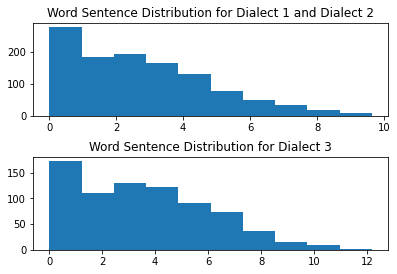

In [107]:
fig, ax = plt.subplots(nrows=2)
fig.tight_layout(pad=2.0)
ax[0].hist(df[df['dialect'].isin(['DR1','DR2'])]['total_wd'])
ax[0].set_title("Word Sentence Distribution for Dialect 1 and Dialect 2")
ax[1].hist(df[df['dialect'].isin(['DR3'])]['total_wd'])
ax[1].set_title("Word Sentence Distribution for Dialect 3")

## Getting Distances in The Training Set

In [108]:
for i in range(3):
    print(f"Actual: ",df.iloc[i].sentence)
    print(f"\nPredicted: ",df.iloc[i].predictions)
    print(f"\nWord Dist: ",df.iloc[i].wd)
    print("\n")

Actual:  don't ask me to carry an oily rag like that

Predicted:  don't ask me to carry an oily rag like that

Word Dist:  0,0,0,0,0,0,0,0,0,0


Actual:  these exclusive documents must be locked up at all times

Predicted:  these excitement documents many be locked up it all times

Word Dist:  0,0.95,0,1.26,0,0,0,0.63,0,0


Actual:  but to the infuriation of scientists for no known reason not all of them did

Predicted:  but to the available of system for no known damage not all a them deal

Word Dist:  0,0,0,1.01,0,0.99,0,0,0,1.43,0,0,1.22,0,1.08




## Getting Distances in the Test Set

In [109]:
for i in range(3):
    print(f"Actual: ",df[df['dialect']=='DR3'].iloc[i].sentence)
    print(f"\nPredicted: ",df[df['dialect']=='DR3'].iloc[i].predictions)
    print(f"\nWord Dist: ",df[df['dialect']=='DR3'].iloc[i].wd)
    print("\n")

Actual:  don't ask me to carry an oily rag like that

Predicted:  don't ask me to carry an oily rag like that

Word Dist:  0,0,0,0,0,0,0,0,0,0


Actual:  why the hell didn't you come out when you saw them gang up on me

Predicted:  why the have dealers you caused are when you saw them grow up on me

Word Dist:  0,0,1.09,0.84,0,0.93,0.74,0,0,0,0,1.31,0,0,0


Actual:  the overweight charmer could slip poison into anyone's tea

Predicted:  the only remove could slightly film into anyone's to

Word Dist:  0,1.01,1.09,0,0.72,0.8,0,0,0.93


